In [1]:
#import library for reading and manipulation of data
import pandas as pd
import numpy as np
#import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import library to scale the data
from sklearn.preprocessing import StandardScaler
#import library for PCA, k-mean, DBSCAN and compute silhouette
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
#load the data
CreditCd= pd.read_excel(r"C:\Users\User\Downloads\Credit+Card+Customer+Data.xlsx")
CreditCd.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
#Ensure that Customer key is remodified
CreditCd.columns=[c.replace(' ', '_') for c in CreditCd.columns]
CreditCd.columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [4]:
#Check the missing values
CreditCd.isna().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
#check duplicate value
CreditCd.duplicated().sum() 

0

In [6]:
#Dropping Sl_No and Customer_Key
CreditCd= CreditCd.drop(['Sl_No', 'Customer_Key'], axis=1)
CreditCd

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [7]:
CreditCard=CreditCd.copy()
CreditCard

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [8]:
#Check the dimension of the dataset
CreditCard.shape

(660, 5)

- There are 660 rows and 5 columns after two columns were earlier dropped

In [9]:
#Descriptive analysis of the dataset
CreditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


- The Avg_Credit_Limit is between 3000 and 200000
- Total_Credit_Cards an indivudual can possess is 10 and minimum of 1
- The maximum number of bank visit is 5
- The maximum number of online visit is 15
- Total_The maximum number of calls_made  is 10

## Univariate Analysis

In [10]:
# Function to combine two plots together will be deployed
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

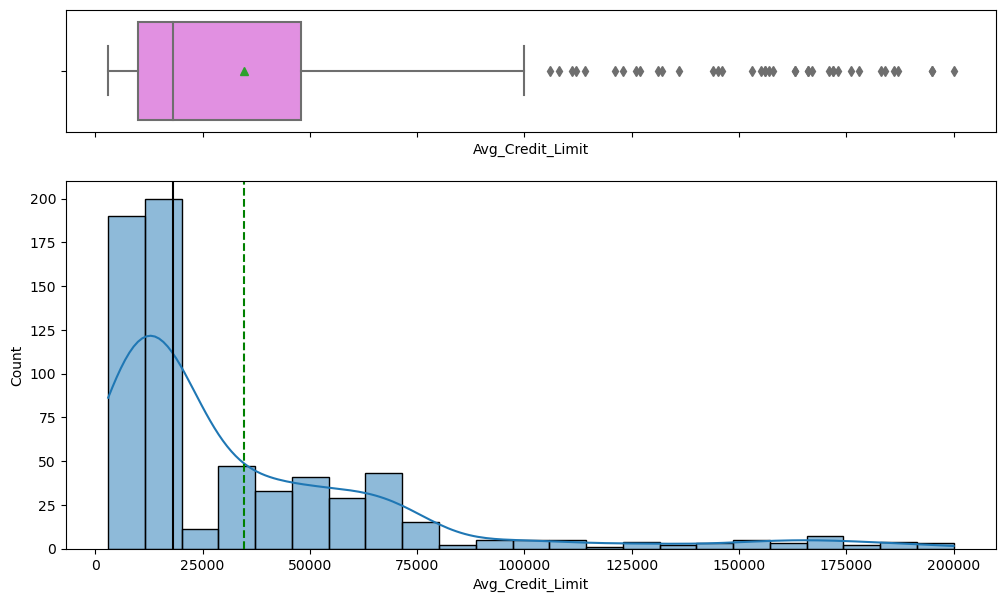

In [11]:
histogram_boxplot(data = CreditCard, feature = "Avg_Credit_Limit")

- This is a right skewed distribution, the mean is far greater than the median
- There are outliers in the distribution

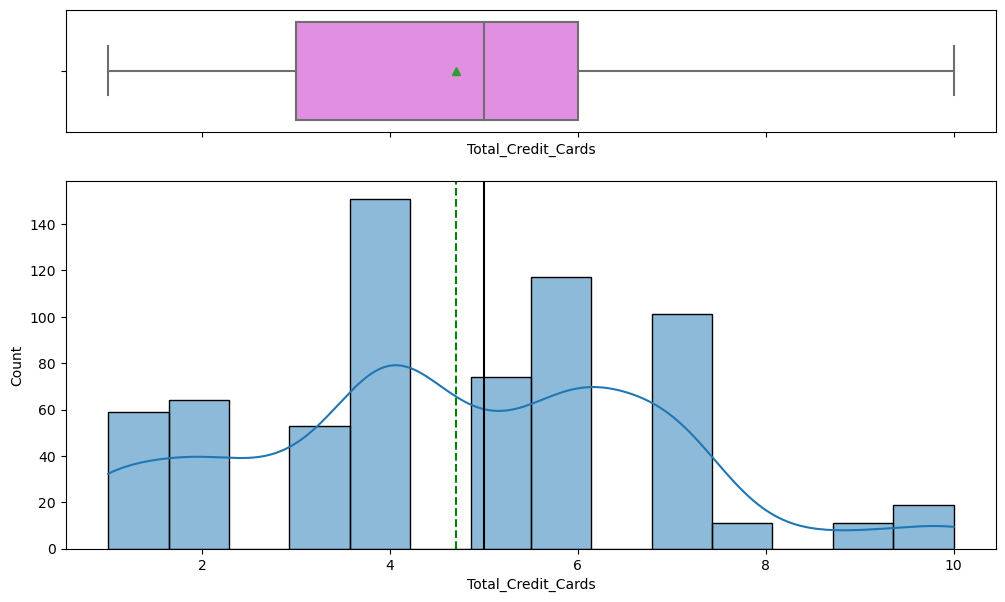

In [12]:
histogram_boxplot(data = CreditCard, feature = "Total_Credit_Cards")

- The distribution is slightly left skewed, the median is a bit closer to the mean
- There are no outliers

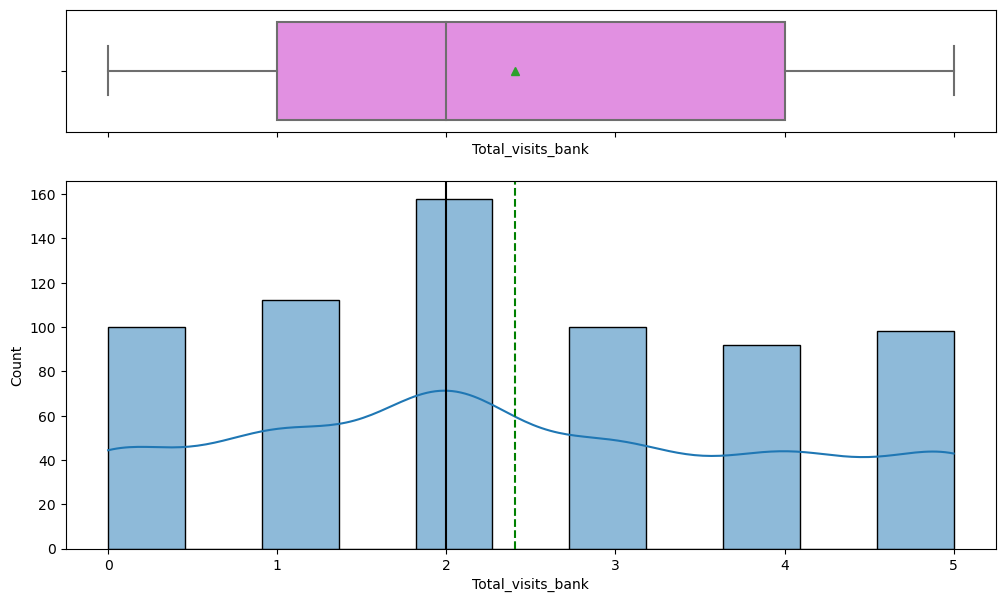

In [13]:
histogram_boxplot(data = CreditCard, feature = "Total_visits_bank")

- The distribution is slightly right skewed, we have a slight differences between the mean and median
- There are no outliers

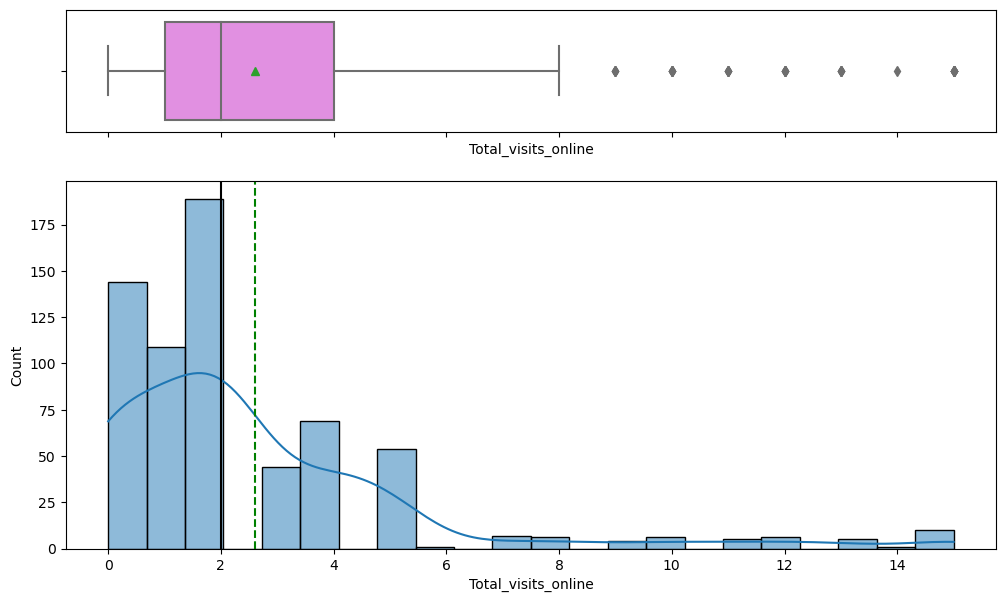

In [14]:
histogram_boxplot(data = CreditCard, feature = "Total_visits_online")

- This is a right skewed distribution, mean is far from the median
- There are outliers

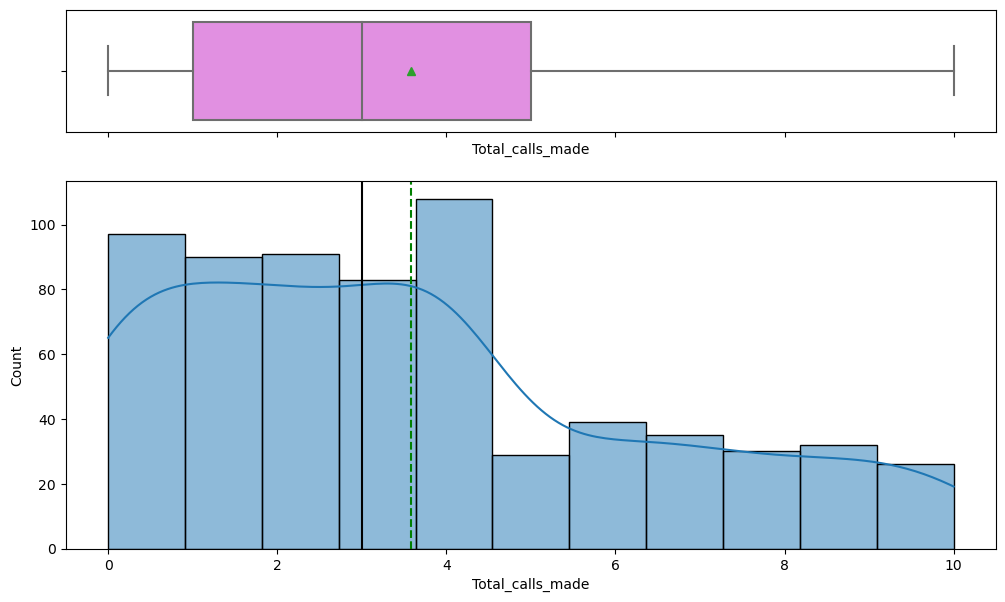

In [15]:
histogram_boxplot(data = CreditCard, feature = "Total_calls_made")

- This is a slightly right skewed distribution, mean is closer to the median
- There is no outlier

## Bivariate Analysis
- This is to analyse the correlation between two variables 

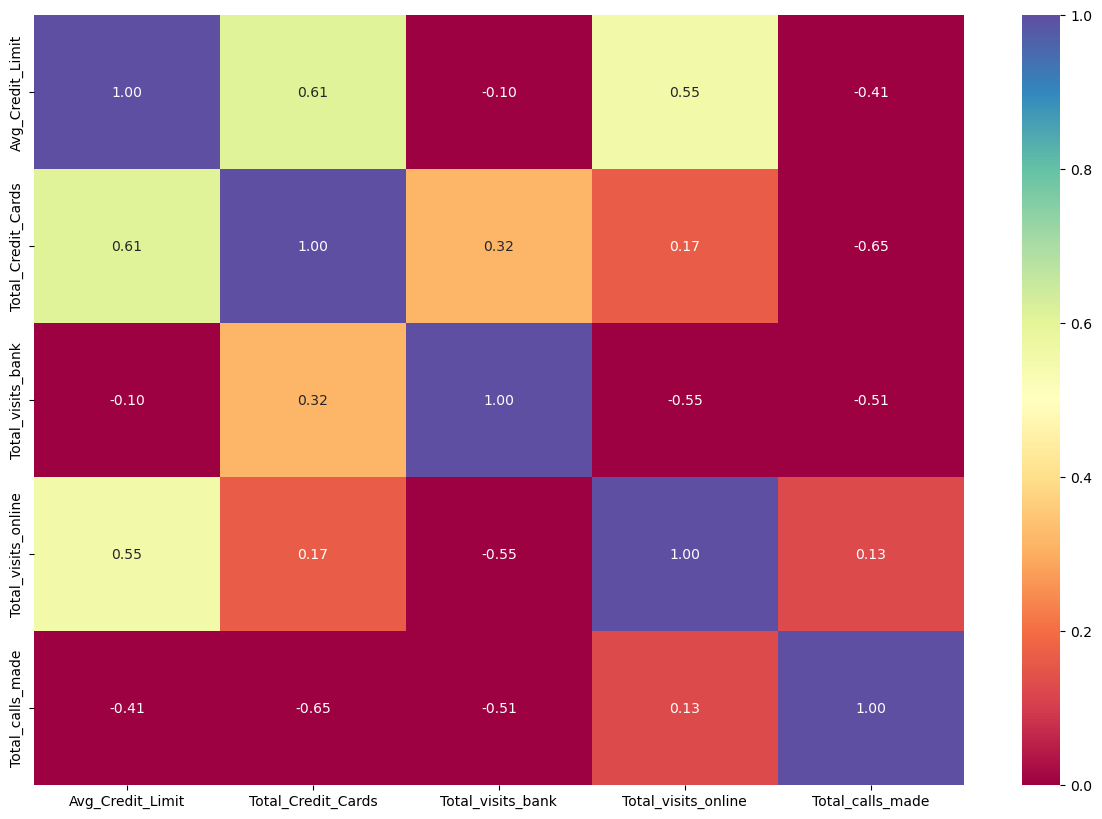

In [16]:
#Creating a heatmap to visualize the correlation between the variables
plt.figure(figsize=(15,10))
sns.heatmap(CreditCard.corr(), annot=True, vmin=0, vmax=1, fmt='.2f', cmap='Spectral');

- Total_Credit_card and Total_visits_online are moderately positively correlated to Average_credit_limit
- Total_Credit_card and Total visits_bank are moderately negatively correlated to Total_calls_made
- Average_credit_limit and Total_calls_made are moderately negatively correlated

### We will deploy deploy boxplot for our visualization

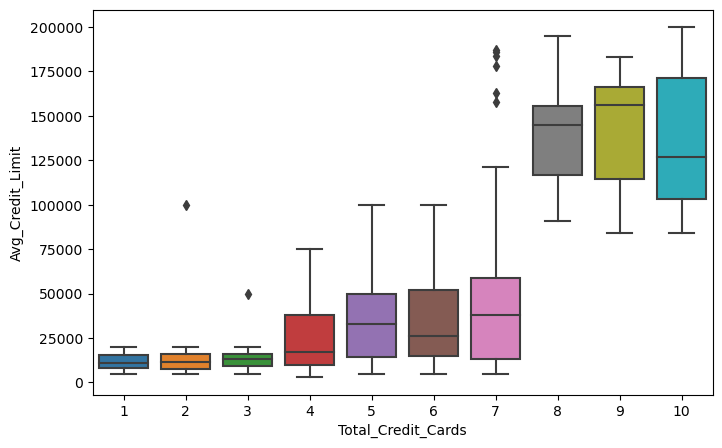

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_Credit_Cards", data=CreditCard)
plt.show()

- Client with higher number of Total_Credit_Cards has the highest Average credit limit
- Client with lower number of Total_Credit_Cards has the lower Average credit limit

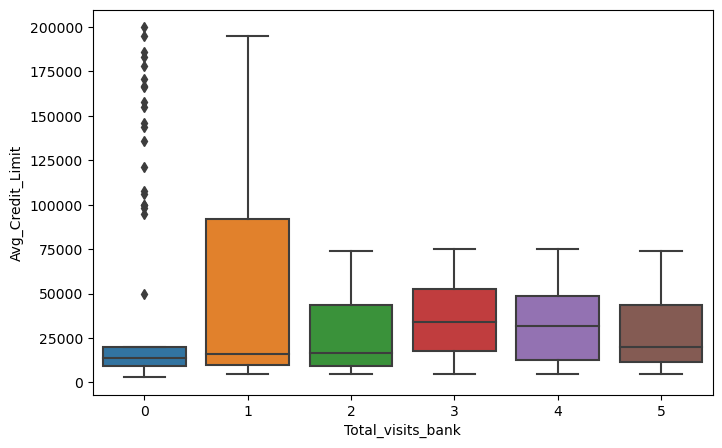

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_visits_bank", data=CreditCard)
plt.show()

- Customer with only one visit to the bank has the highest Average credit limit

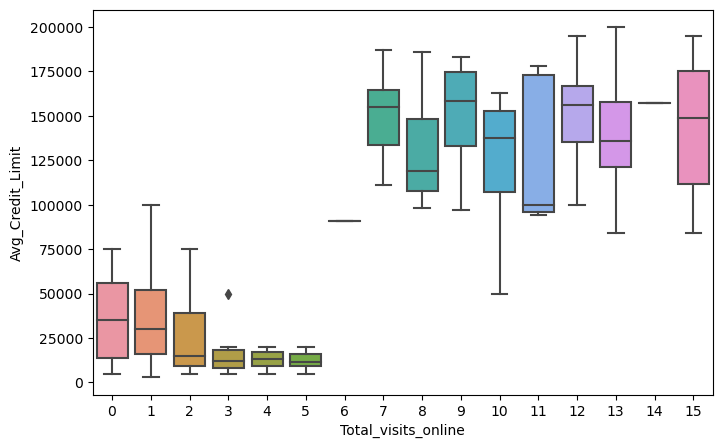

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_visits_online", data=CreditCard)
plt.show()

- Customer that frequently visit the online platform has the highest Average Credit Limit
- Client with less than 5 visit to the online platform has a lower Average Credit Limit

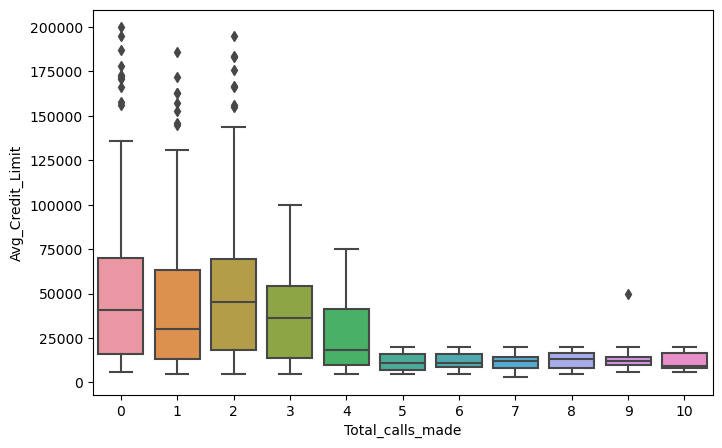

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Avg_Credit_Limit", x="Total_calls_made", data=CreditCard)
plt.show()

- Customers that calls frequently has lower Average Credit Limit
- Customers with less calls has lower Average Credit Limit

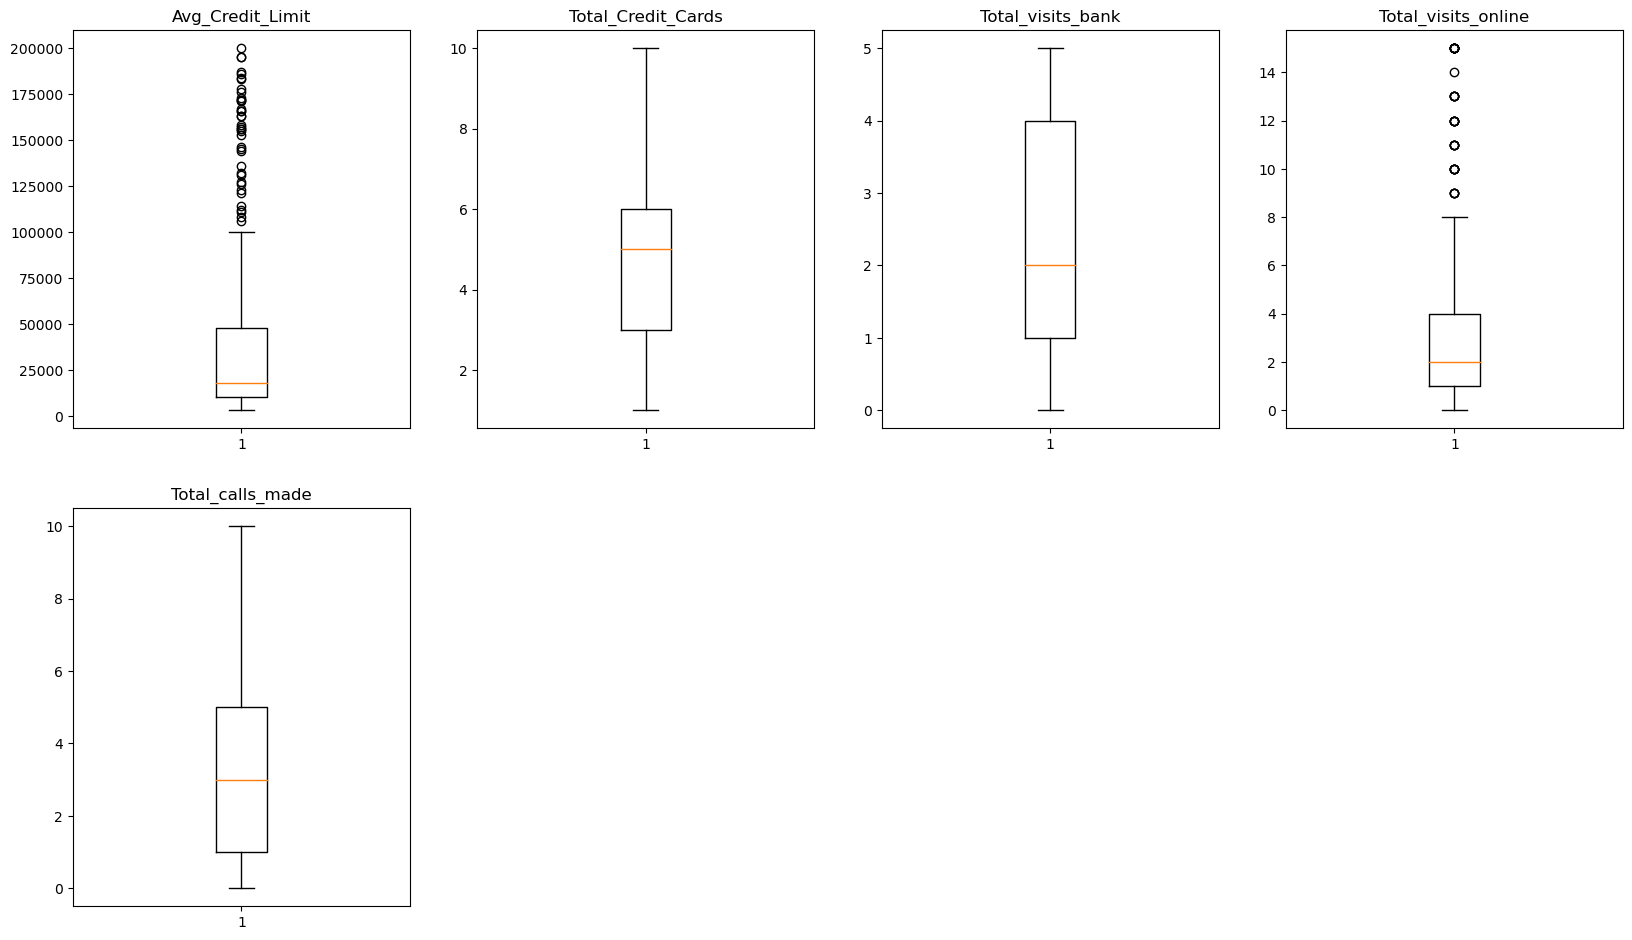

In [21]:
#Visualizing the outliers in the datasets
numeric_columns = CreditCard.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(CreditCard[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

- There are outliers in Average Credit Limit and Total Visit Online

In [22]:
#Treating the outliers
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [23]:
CreditCard = treat_outliers_all(CreditCard, numeric_columns)

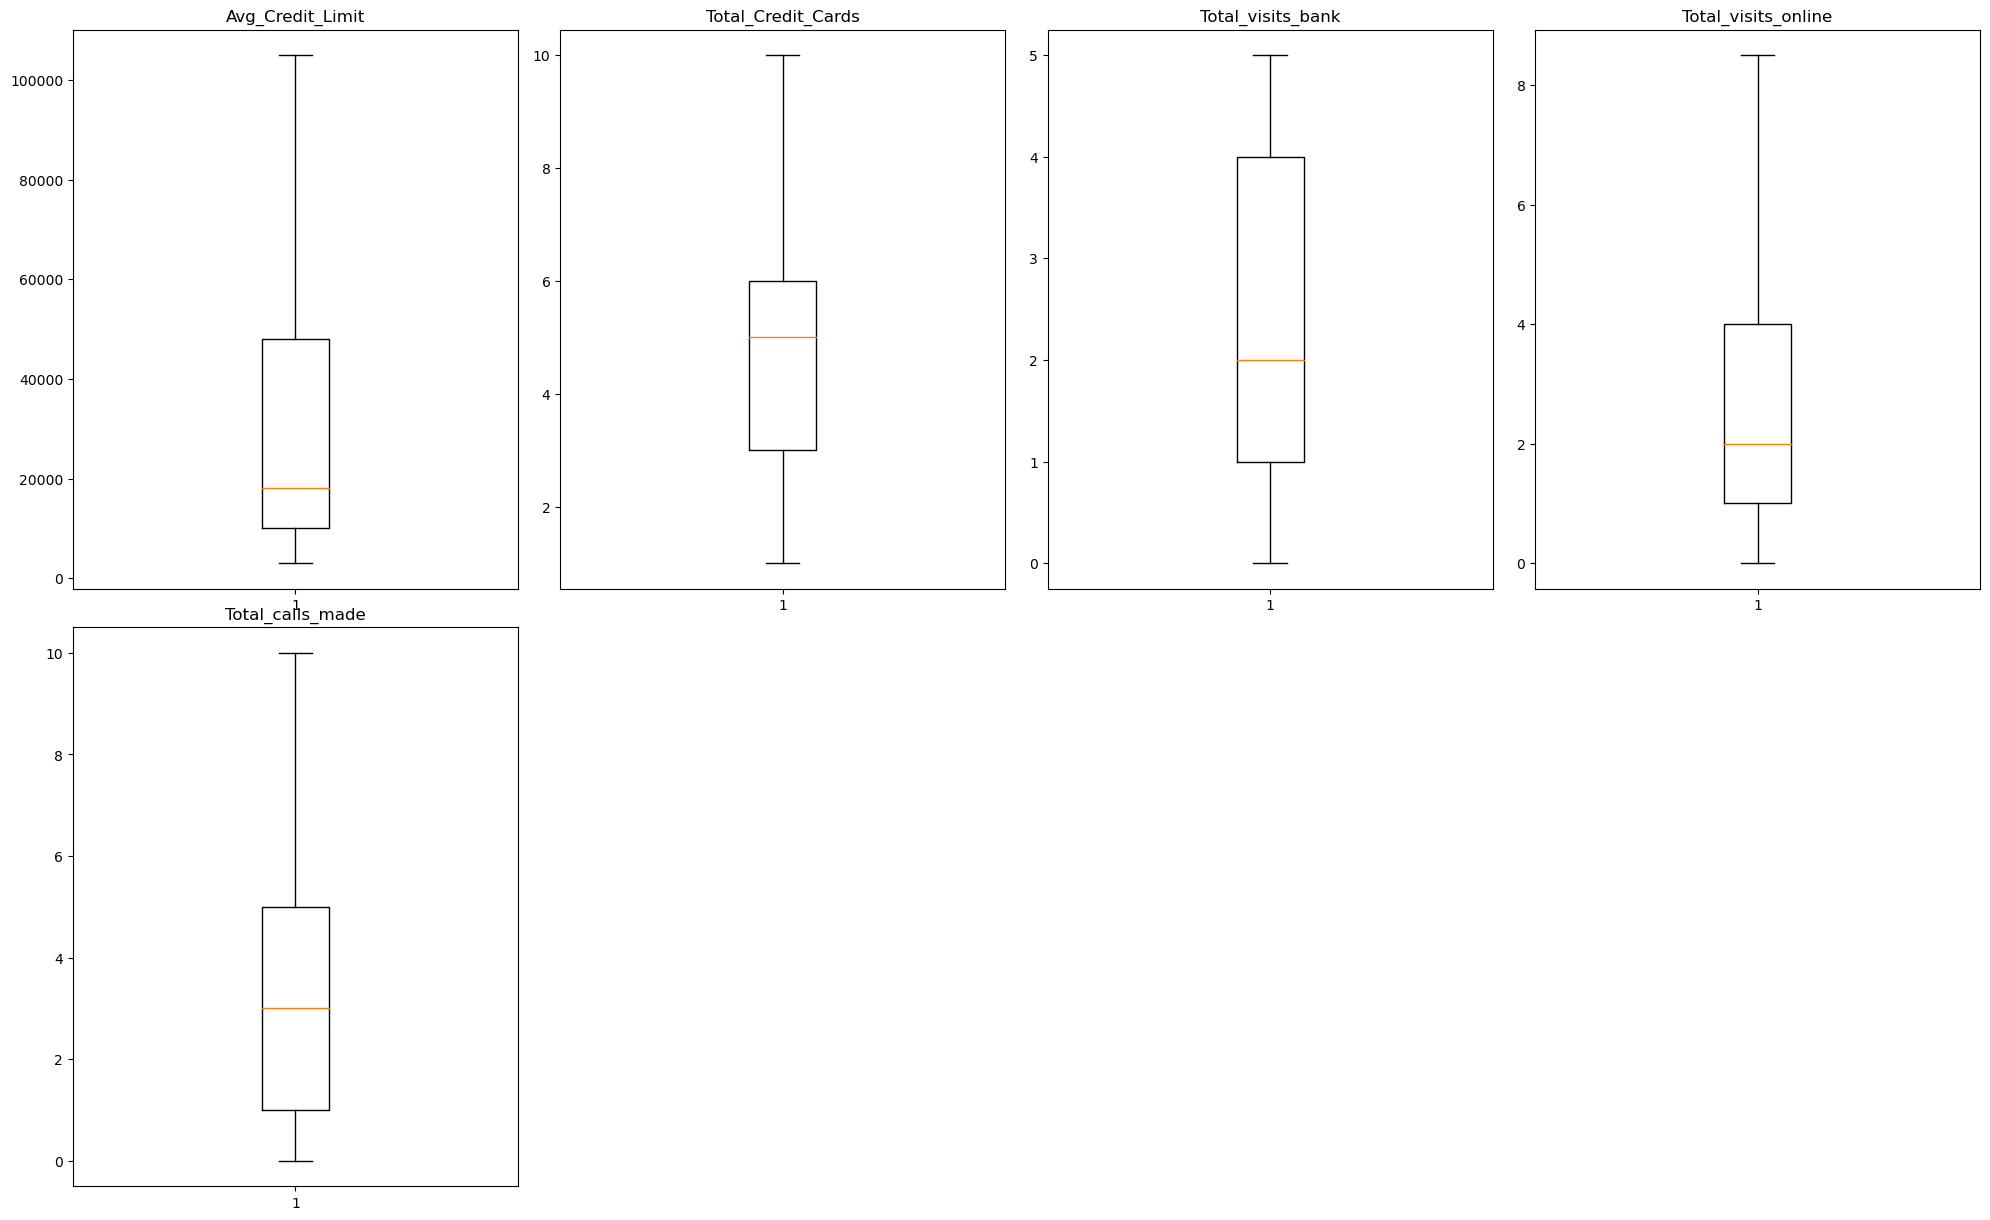

In [24]:
#Visualizing the data to check if outliers have been treated
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(CreditCard[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers have been treated

## PCA

In [25]:
#scale the dataset
scaler= StandardScaler()
CreditCard_sd= scaler.fit_transform(CreditCard)
CreditCard_sd

array([[ 2.39894174, -1.24922476, -0.86045063, -0.6197673 , -1.25153737],
       [ 0.64361851, -0.78758515, -1.47373077,  2.70581334,  1.89185881],
       [ 0.64361851,  1.05897329, -0.86045063,  0.2670542 ,  0.1455276 ],
       ...,
       [ 2.57447406,  1.5206129 , -0.86045063,  2.70581334, -0.90227113],
       [ 2.57447406,  2.44389211, -0.86045063,  2.70581334, -1.25153737],
       [ 2.57447406,  1.9822525 , -1.47373077,  2.70581334, -0.55300488]])

In [26]:
# Fit the model and deduce the shape of the PCA
pca= PCA(n_components=2)
CreditCard_pca= pca.fit_transform(CreditCard)
CreditCard_pca.shape

(660, 2)

In [27]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


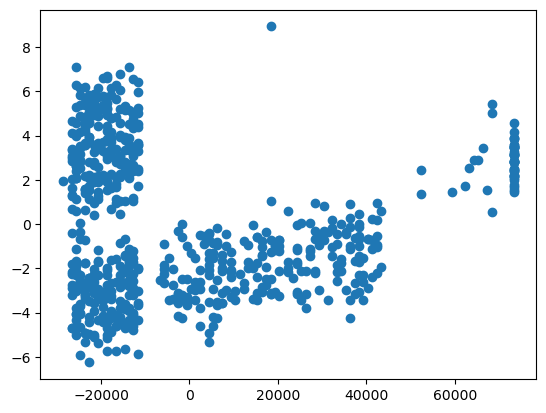

In [28]:
# Import Library to visualize the principal component
import mglearn
plt.scatter(CreditCard_pca[:,0], CreditCard_pca[:,1], cmap=mglearn.cm2);

- The graph above that the dataset will cluster well.

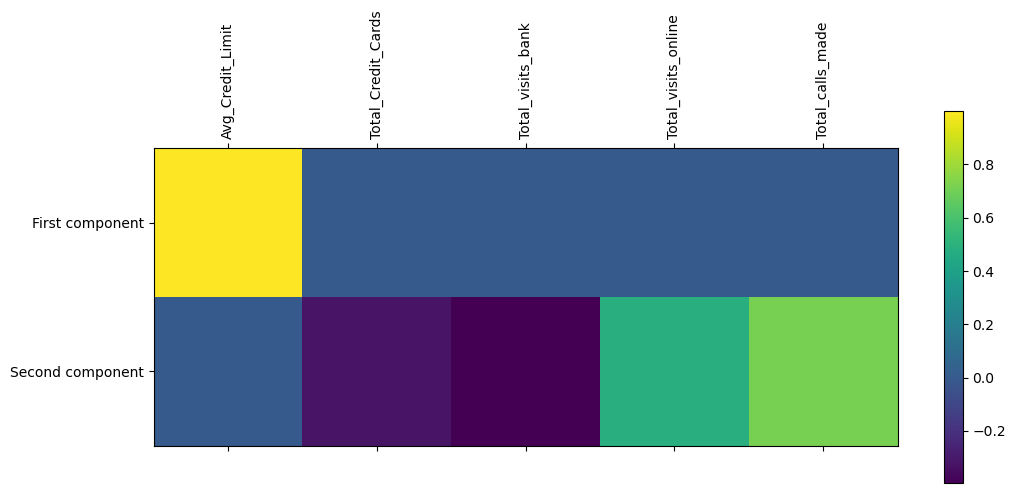

In [29]:
#To visualize the important components
plt.matshow(pca.components_, cmap= 'viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(CreditCard.columns)), CreditCard.columns, rotation=90);

- The plot above shows that Average Credit Limit is the most important component in the principal component

In [30]:
pca.explained_variance_ratio_.sum()

0.9999999926445821

In [31]:
optimal_com= []
for n_comp in range (1,6):
    pca= PCA(n_components=n_comp)
    CreditCard_pca= pca.fit_transform(CreditCard)
    optimal_com.append(pca.explained_variance_ratio_.sum())
optimal_com

[0.9999999795415593,
 0.9999999926445821,
 0.999999996623407,
 0.9999999987747009,
 0.9999999999999998]

In [32]:
#To get the maximum PCA component
max_index= np.argmax(optimal_com)
pca= PCA(n_components=max_index)
CreditCard_pca= pca.fit_transform(CreditCard)
CreditCard_pca.shape

(660, 4)

## Clustering (KMeans)

In [33]:
#KMeans algorithms
kmean= KMeans(random_state=0)

In [34]:
SSE = []  # variable to store inertia

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(CreditCard_sd)
    SSE.append(kmeans.inertia_);

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

In [35]:
SSE

[3300.000000000001,
 1949.9046848867492,
 998.4661061743781,
 813.8562952708253,
 715.7557446616082,
 640.173732356311,
 588.4238768137001,
 560.0579074147257,
 537.5220212116926]

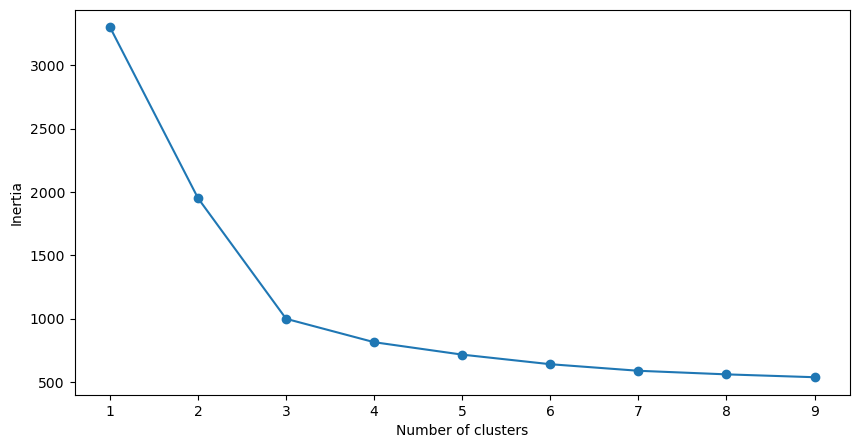

In [36]:
#plot to deduce the elbow curve
frame = pd.DataFrame({"Cluster": range(1, 10), "SSE": SSE})


plt.figure(figsize = (10, 5))
plt.plot(frame["Cluster"], frame["SSE"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

- From the above elbow curve, it will be going with 4 clusters

In [37]:
#rebuild the model with 4 number of clusters
kmeans = KMeans(n_clusters = 4, random_state=0)
pred =kmeans.fit_predict(CreditCard_sd)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [38]:
kmeans_clusters=pred
kmeans_clusters

array([2, 1, 2, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
#adding kmeans clusters label to the dataset
CreditCard['kmeans_clusters']= kmeans_clusters

In [40]:
#Get the silhouette scores
kmeans_sil= silhouette_score(CreditCard_sd, pred)
kmeans_sil

0.38147048130671246

In [41]:
#create a dataframe for the datasets
CreditCard_df= pd.DataFrame(CreditCard, columns=CreditCard.columns)
CreditCard_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmeans_clusters
0,100000.0,2,1,1.0,0,2
1,50000.0,3,0,8.5,9,1
2,50000.0,7,1,3.0,4,2
3,30000.0,5,1,1.0,4,2
4,100000.0,6,0,8.5,3,3
...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,3
656,84000.0,10,1,8.5,2,3
657,105000.0,8,1,8.5,1,3
658,105000.0,10,1,8.5,0,3


In [42]:
#Get the list of the columns
num_col= CreditCard.columns.tolist()
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made',
 'kmeans_clusters']

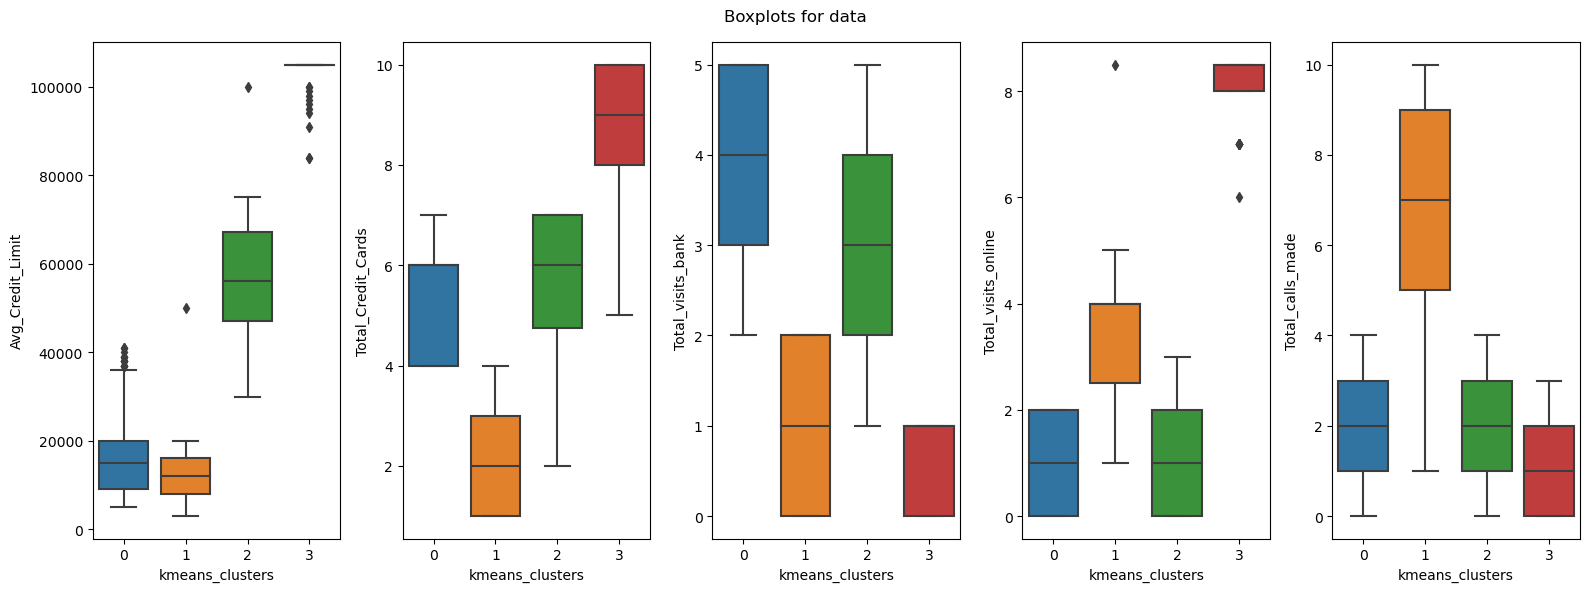

In [43]:
#plot the graph to visualize Kmean_clusters on each column in the dataset
fig, ax = plt.subplots(1, 5, figsize = (16, 6))
fig.suptitle("Boxplots for data")

count = 0
for i in range(5):
    sns.boxplot(ax = ax[i], x = CreditCard["kmeans_clusters"],y = CreditCard[num_col[count]])
    count += 1
fig.tight_layout()

- Customers with higher  average credit limit have higher number of total credit cards, use the online platform often and visit the bank less
- Customer with less than 2 credit cards visit the bank more, visit online minimum number of times and also have a lower average credit limit

## DBSCAN

In [44]:
CreditCard_new= CreditCd.copy()
CreditCard_new_sd= scaler.fit_transform(CreditCard_new)
CreditCard_new_sd

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [45]:
#fit and predict the model usinf DBSCAN
dbscan= DBSCAN()
db_labels=dbscan.fit_predict(CreditCard_new_sd)
db_labels

array([-1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2,  2,  0,  3,  1,  2, -1,
        2,  1,  3,  1,  2,  3,  3,  2,  3,  2, -1,  2,  2,  3,  3, -1,  2,
        3,  2, -1,  2,  3,  1,  7,  6,  1,  2,  1,  3,  4,  1, -1,  1,  2,
        3,  3,  2,  2,  4, -1,  2,  2,  3,  3, -1, -1,  2,  2,  3,  2,  1,
        0,  0,  0,  1,  3,  3,  2,  3,  0,  3,  2,  6,  1,  3,  3,  3,  1,
        3,  3, -1,  3,  7,  3, -1,  3,  0, -1,  0,  1,  2,  3,  3,  2,  3,
        3,  2, -1,  3,  3,  1,  1, -1,  1,  2,  3, -1,  2,  1,  2,  2,  3,
        2,  1,  2,  5,  3,  1,  3,  3, -1,  3,  3,  3, -1, -1,  3,  3,  1,
        2,  2,  3,  2,  2,  2,  3,  3,  7,  2,  3,  1, -1,  6, -1,  3,  1,
        2,  7,  3, -1,  0, -1,  4,  2,  1,  2,  2,  2,  2,  2,  1,  3,  3,
        6,  1,  2,  3, -1, -1,  1,  2,  3,  5,  2,  2,  2,  0, -1,  2,  1,
        1,  2,  1,  2,  3,  2,  1,  2,  3,  2,  6,  3,  7,  2,  2,  2,  2,
       -1, -1, -1,  1,  2,  2,  3,  3,  3,  2,  3,  2,  3, -1,  3,  3,  2,
        1,  3,  1,  3, -1

In [46]:
#Get the series of the label
pd.Series(db_labels).unique()

array([-1,  2,  0,  3,  1,  7,  6,  4,  5,  8,  9, 10, 11, 19, 14, 12, 13,
       22, 23, 16, 18, 17, 15, 20, 21], dtype=int64)

In [47]:
#import tool to help us generate the hyper parameter manually
import itertools

In [48]:
#Choose the range for the hyper parameters
eps = np.linspace(0.01, 10, 10)
min_samples= np.arange(2,10,2)

In [49]:
#Check the hyper_list
hyper_list = list(itertools.product(eps, min_samples))
hyper_list

[(0.01, 2),
 (0.01, 4),
 (0.01, 6),
 (0.01, 8),
 (1.12, 2),
 (1.12, 4),
 (1.12, 6),
 (1.12, 8),
 (2.23, 2),
 (2.23, 4),
 (2.23, 6),
 (2.23, 8),
 (3.34, 2),
 (3.34, 4),
 (3.34, 6),
 (3.34, 8),
 (4.45, 2),
 (4.45, 4),
 (4.45, 6),
 (4.45, 8),
 (5.5600000000000005, 2),
 (5.5600000000000005, 4),
 (5.5600000000000005, 6),
 (5.5600000000000005, 8),
 (6.67, 2),
 (6.67, 4),
 (6.67, 6),
 (6.67, 8),
 (7.78, 2),
 (7.78, 4),
 (7.78, 6),
 (7.78, 8),
 (8.89, 2),
 (8.89, 4),
 (8.89, 6),
 (8.89, 8),
 (10.0, 2),
 (10.0, 4),
 (10.0, 6),
 (10.0, 8)]

In [50]:
#Create a for loop to get the sil_scores
db_sil_scores= []
for (eps, min_Pts) in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples= min_Pts)
    db_label= dbscan.fit_predict(CreditCard_new_sd)
    sil_scores= silhouette_score(CreditCard_new_sd, db_labels)
    db_sil_scores.append(sil_scores)

In [51]:
#Deduce the optimal eps and min_samples
sil_ind=np.argmax(db_sil_scores)
opt_eps, opt_num=hyper_list[sil_ind]

In [52]:
# Re-build the model with the optimal eps and min_samples
dbscan1= DBSCAN(eps=opt_eps, min_samples=opt_num)
db_labels1=dbscan1.fit_predict(CreditCard_sd)
db_labels1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [53]:
#Get the series of the label
pd.Series(db_labels1).unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20], dtype=int64)

In [54]:
#Add the db_clusters to the label
CreditCard['db_clusters']= db_labels1
CreditCard

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,kmeans_clusters,db_clusters
0,100000.0,2,1,1.0,0,2,-1
1,50000.0,3,0,8.5,9,1,-1
2,50000.0,7,1,3.0,4,2,-1
3,30000.0,5,1,1.0,4,2,-1
4,100000.0,6,0,8.5,3,3,-1
...,...,...,...,...,...,...,...
655,99000.0,10,1,8.5,0,3,-1
656,84000.0,10,1,8.5,2,3,-1
657,105000.0,8,1,8.5,1,3,-1
658,105000.0,10,1,8.5,0,3,-1


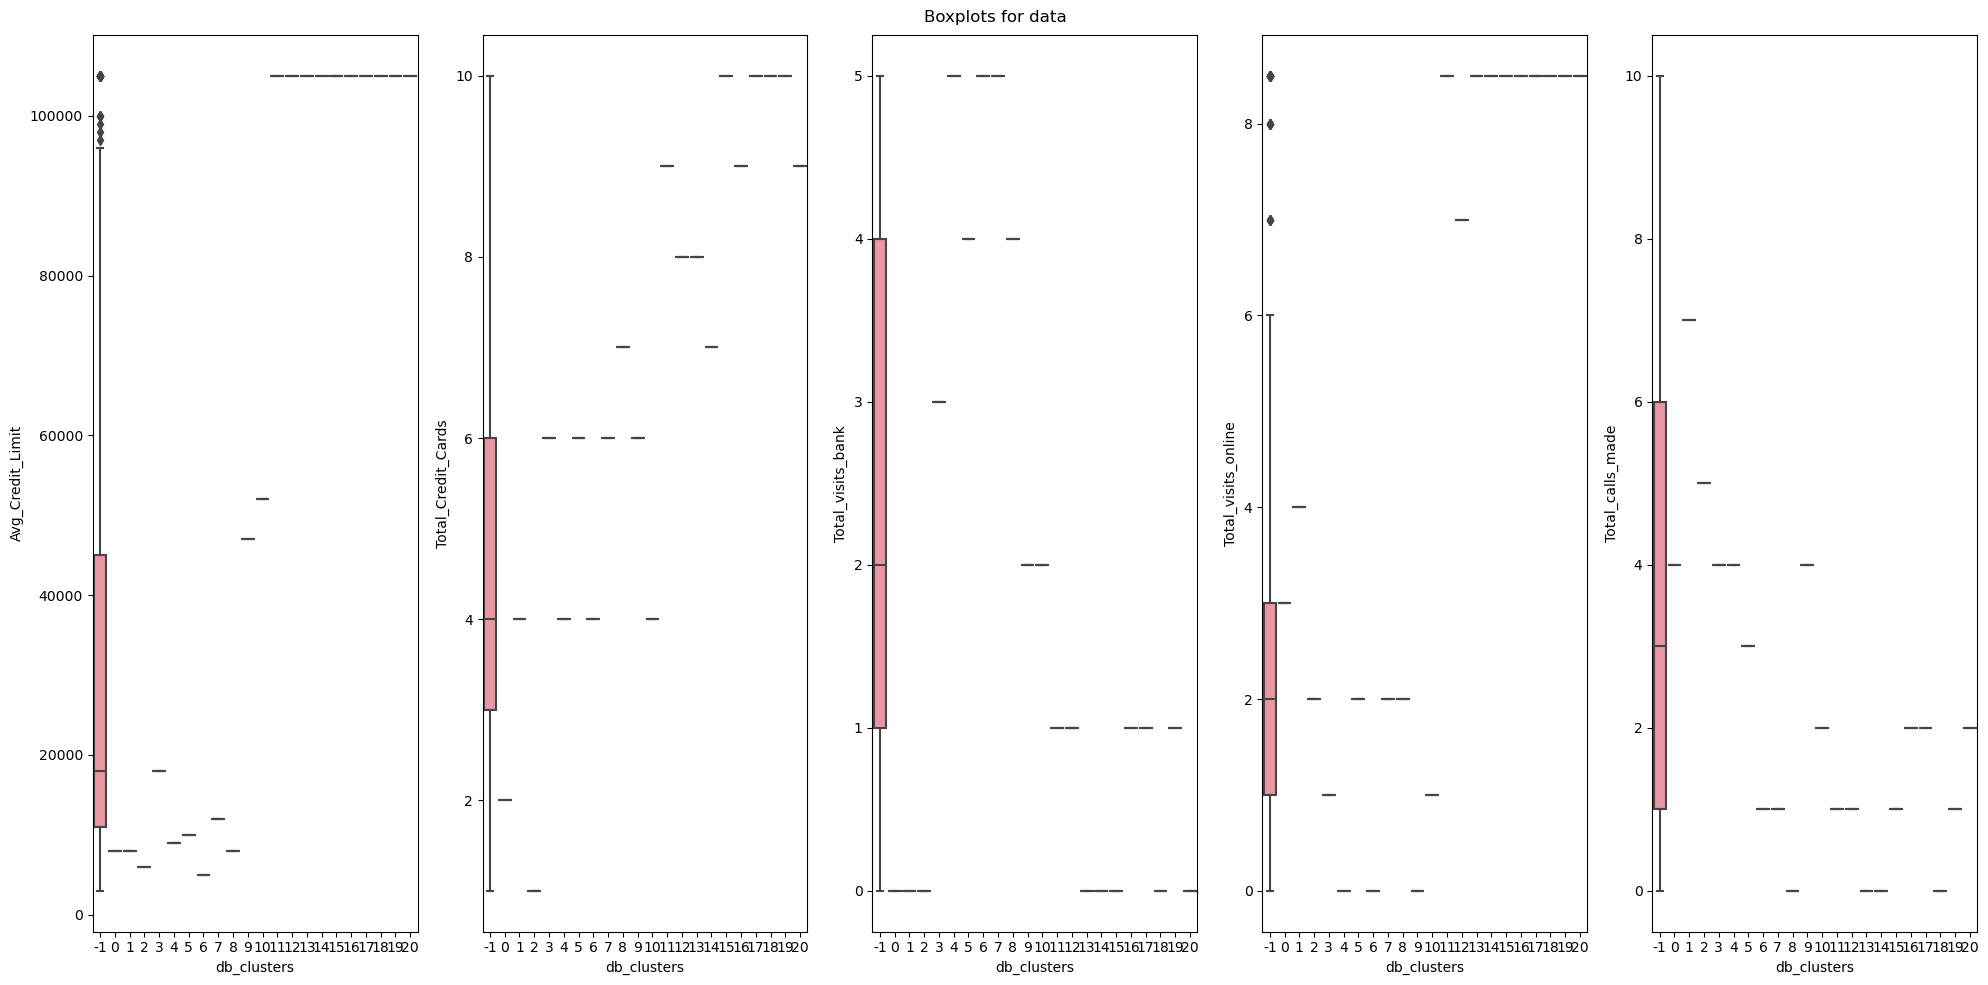

In [55]:
#plot the graph to visualize Kmean_clusters on each column in the dataset
fig, ax = plt.subplots(1, 5, figsize = (20, 10))
fig.suptitle("Boxplots for data")

count = 0
for i in range(5):
    sns.boxplot(ax = ax[i], x = CreditCard['db_clusters'],y = CreditCard[num_col[count]])
    count += 1
fig.tight_layout()

- The clustering is not really visible unless in the noise
- However it can be deduced that the higher the online visit, the higher the Total credit card and the higher the the Average Credit Limit.

## Observation

- DBSCAN gives us the levearge to deduce the noise in the model
- Kmeans cluster more with all varibales while DBSCAN is well visualized with Average Credit Limit and Online Visits
- It can be deduced with DBASCAN that the higher the online visit, the higher the Total credit card and the higher the the Average Credit Limit
- it can also be deduced with Kmeans that; customers with higher  average credit limit have higher number of total credit cards, use the online platform often and visit the bank less. And customer with less than 2 credit cards visit the bank more, visit online minimum number of times and also have a lower average credit limit.

## Conclusion

- If we are considering customers that will be eligible for increase in their average credit limit, focus should be on their number of cards and how often they visit the online platforms.
- If the consideration is for non credit card user, focus be on customers that visit the bank more and also call the bank often.